# Roundup of Day 1 - 3
# Strategies to help us interrogate high dimensional spaces
# How do we make sense of a 20 dimensional space?
# Equip ourselves with some investigative strategies:
# 1. Line searches to interrogate the function
# Instead visualising the entire space we can visualise part of it.
# One-dimensional line searches is useful to investigate the noise and potential multi-modality (only indicative but yet useful)
# Useful to interogate Surrogate / Approximation response surfaces

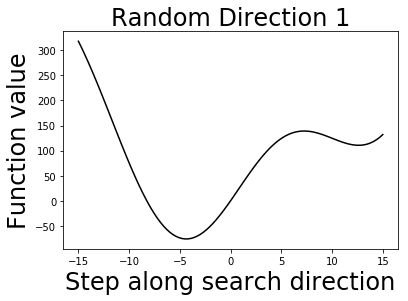

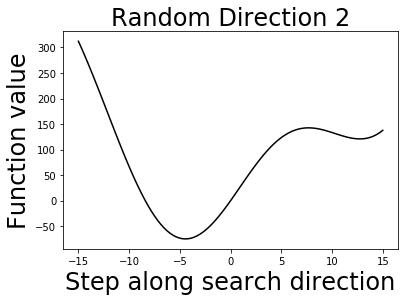

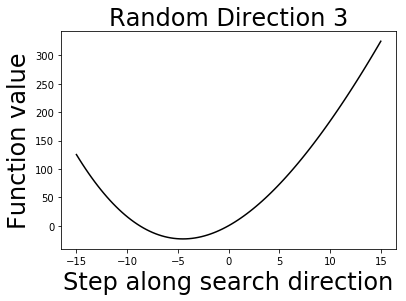

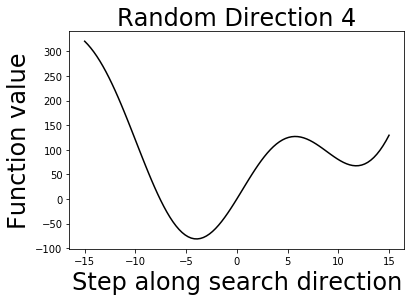

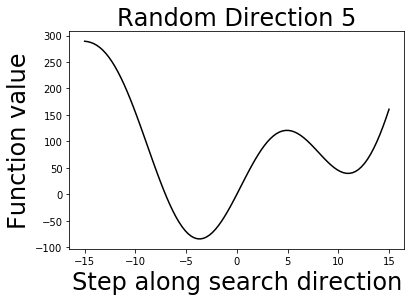

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def multimodal_function(x):
    return (np.sum(x**2) + 100*np.sin(x[0]))

# Define 20 dimensional problem
X0 = np.zeros((20,1))
alpha = np.linspace(-15,15,101)
# Define a direction along which to depict the response
for number in range(5):
    DIRECTION = np.random.rand(20,1); DIRECTION = DIRECTION/np.linalg.norm(DIRECTION)
# Choose the step lengths to take along the design domain
    f_response = []
    for a in alpha:
        f_response.append(multimodal_function(X0+a*DIRECTION))

    plt.figure(number);plt.plot(alpha,f_response,'k-');plt.xlabel('Step along search direction',fontsize=24);plt.title('Random Direction '+str(number+1),fontsize=24);plt.ylabel('Function value',fontsize=24);plt.show()

# 2. Multiple starts for optimizers and see where you end up

Text(0,0.5,'Frequency')

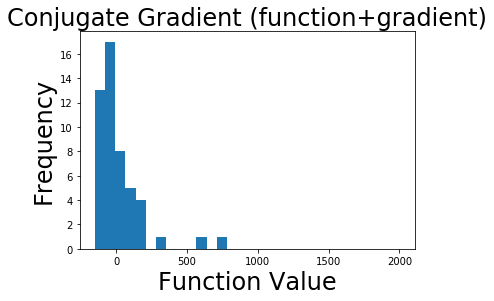

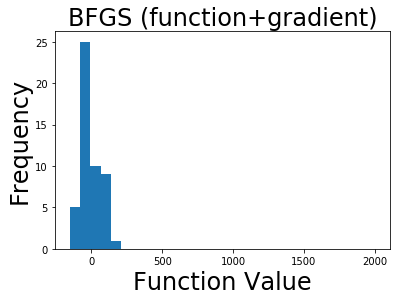

In [99]:
import scipy.optimize as opt

X0 = np.random.rand(50,20)*30-15
bins = np.linspace(-150,2000,31)

XLIST = []
FLIST = []
for x0 in X0:
    result = opt.minimize(multimodal_function,x0,method='cg')
    XLIST.append(result['x'])
    FLIST.append(result['fun'])
plt.figure(1);plt.hist(FLIST,bins);plt.title('Conjugate Gradient (function+gradient)',fontsize=24);plt.xlabel('Function Value',fontsize=24);plt.ylabel('Frequency',fontsize=24)

XLIST = []
FLIST = []
for x0 in X0:
    result = opt.minimize(multimodal_function,x0,method='bfgs')
    XLIST.append(result['x'])
    FLIST.append(result['fun'])
plt.figure(2);plt.hist(FLIST,bins);plt.title('BFGS (function+gradient)',fontsize=24);plt.xlabel('Function Value',fontsize=24);plt.ylabel('Frequency',fontsize=24)

# 3. Random perturbations around the solution

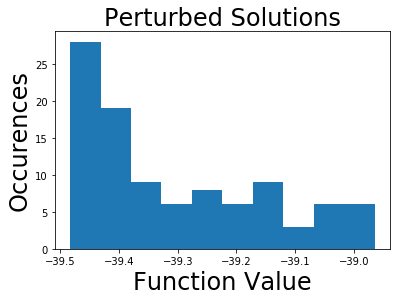

Minimum at solution is  -39.52684283191171


In [100]:
PERTURB = np.random.rand(100,20)*0.1
F = []
for p in PERTURB:
    perturbresult = multimodal_function(result['x']+p)
    F.append(perturbresult)

plt.hist(F);plt.title('Perturbed Solutions',fontsize=24);plt.xlabel('Function Value',fontsize=24);plt.ylabel('Occurences',fontsize=24);plt.show()
print('Minimum at solution is ',result['fun'])


# General optimization problem
# $\min_\mathbf{x} f(\mathbf{x})$
# subject to
# $\mathbf{h}(\mathbf{x}) = \mathbf{0}$ (equality constraints)
# $\mathbf{g}(\mathbf{x}) \geq \mathbf{0}$  (inequality constraints)
-----------
# Consider the following unconstrained quadratic problem in 8 dimensions:
# \begin{equation}
    \begin{array}{c}
	        f_(\mathbf{x}) = \sum_{k=1}^{8} \sqrt{13k}(x_k - k)^2\\ 
	      0 \leq x_k^0 \leq 20,\;\;\;k = 1,\dots,8\\ 
	      \end{array}
	    \end{equation}

In [56]:
%matplotlib inline
print('Problem 2 run this cell then optimization cell')
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def f(x):
    fsum = 0
    for k in range(1,len(x)+1):
        fsum = fsum + np.sqrt(13*k)*(x[k-1]-k)**2
    return fsum

def dfdx(x):
    df = np.zeros(np.shape(x))
    for k in range(1,len(x)+1):
        df[k-1] = 2*np.sqrt(13*k)*(x[k-1]-k)
    return df

def d2fdx2(x):
    H = np.eye(len(x))
    for i in range(len(x)):
        k = i+1
        H[i,i] = 2*np.sqrt(13*k)*H[i,i]
    return H

XSTAR = np.array([1,2,3,4,5,6,7,8])

Problem 2 run this cell then optimization cell


Text(0.5,1,'Number of Function Evaluations')

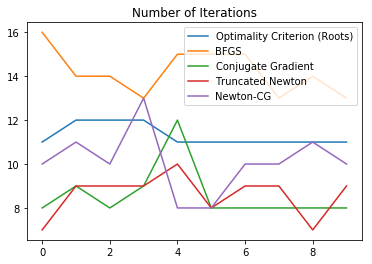

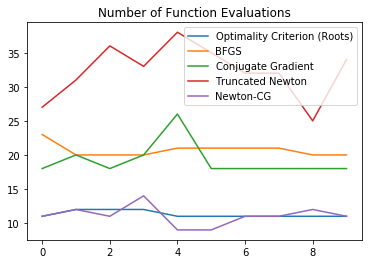

In [80]:
import matplotlib.pyplot as plt

N = 10
ITER = np.zeros((7,N))
NFEV = np.zeros((7,N))
NJEV = np.zeros((7,N))
XNORM = np.zeros((7,N))

for i in range(N):
    x0 = np.random.random(8)*20

    # Solving for the roots of the gradient vector
    result1 = opt.fsolve(dfdx,x0,full_output=1)
    ITER[0,i] = result1[1]['nfev']
    NFEV[0,i] = result1[1]['nfev'] 
    XNORM[0,i] = np.linalg.norm(result1[0]-XSTAR)

    # Minimizing using the Quasi-Newton BFGS algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='BFGS')
    ITER[1,i] = result['nit']
    NFEV[1,i] = result['nfev']    
    XNORM[1,i] = np.linalg.norm(result['x']-XSTAR)

    # Minimizing using the Conjugate Gradient algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='CG')
    ITER[2,i] = result['nit']
    NFEV[2,i] = result['nfev']    
    XNORM[2,i] = np.linalg.norm(result['x']-XSTAR)
    
    # Minimizing using the Truncated Newton algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='TNC')
    ITER[3,i] = result['nit']
    NFEV[3,i] = result['nfev']    
    XNORM[3,i] = np.linalg.norm(result['x']-XSTAR)
    
    # Minimizing using the Newton Conjugate Gradient algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='Newton-CG')
    ITER[4,i] = result['nit']
    NFEV[4,i] = result['nfev']    
    XNORM[4,i] = np.linalg.norm(result['x']-XSTAR)
    

plt.figure(1);plt.plot(ITER[0:5,:].transpose());plt.legend(['Optimality Criterion (Roots)','BFGS','Conjugate Gradient','Truncated Newton','Newton-CG'],loc='best');plt.title('Number of Iterations')
plt.figure(2);plt.plot(NFEV[0:5,:].transpose());plt.legend(['Optimality Criterion (Roots)','BFGS','Conjugate Gradient','Truncated Newton','Newton-CG'],loc='best');plt.title('Number of Function Evaluations')

# Consider the following unconstrained quartic problem in 8 dimensions:
# $ \begin{equation}
	 \begin{array}{c}
	 f(\mathbf{x}) = \sum_{k=2}^{8} 8(x_k)^4 + (x_k + x_{k-1})^2\\ 
	        x_k^0 = 8,\;\;\;k = 1,\dots,8\\ 
	      \end{array}
	    \end{equation}$

In [83]:
print('Problem 3 run this cell then optimization cell')

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def f(x):
    fsum = 0
    for k in range(2,len(x)+1):
        fsum = fsum + 8*(x[k-1])**4 + (x[k-1] + x[k-2])**2
    return fsum

def dfdx(x):
    df = np.zeros(np.shape(x))
    for k in range(2,len(x)+1):
        df[k-2] = df[k-2] + 2*(x[k-1] + x[k-2])
        df[k-1] = df[k-1] + 32*x[k-1]**3 + 2*(x[k-1] + x[k-2])
    return df

def d2fdx2(x):
    dff = np.zeros((len(x),len(x)))
    for k in range(2,len(x)+1):
        dff[k-2][k-2] = dff[k-2][k-2] + 2
        dff[k-2][k-1] = dff[k-2][k-1] + 2
        dff[k-1][k-2] = dff[k-1][k-2] + 2
        dff[k-1][k-1] = dff[k-1][k-1] + 96*x[k-1]**2 + 2
        
    return dff
N = 10
XSTAR = np.array([0,0,0,0,0,0,0,0])

Problem 3 run this cell then optimization cell


Text(0.5,1,'Number of Function Evaluations')

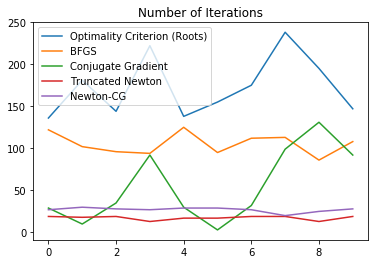

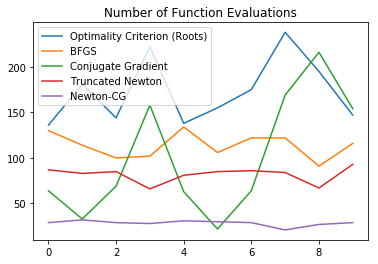

In [82]:
import matplotlib.pyplot as plt

N = 10
ITER = np.zeros((7,N))
NFEV = np.zeros((7,N))
NJEV = np.zeros((7,N))
XNORM = np.zeros((7,N))

for i in range(N):
    x0 = np.random.random(8)*20

    # Solving for the roots of the gradient vector
    result1 = opt.fsolve(dfdx,x0,full_output=1)
    ITER[0,i] = result1[1]['nfev']
    NFEV[0,i] = result1[1]['nfev'] 
    XNORM[0,i] = np.linalg.norm(result1[0]-XSTAR)

    # Minimizing using the Quasi-Newton BFGS algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='BFGS')
    ITER[1,i] = result['nit']
    NFEV[1,i] = result['nfev']    
    XNORM[1,i] = np.linalg.norm(result['x']-XSTAR)

    # Minimizing using the Conjugate Gradient algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='CG')
    ITER[2,i] = result['nit']
    NFEV[2,i] = result['nfev']    
    XNORM[2,i] = np.linalg.norm(result['x']-XSTAR)
    
    # Minimizing using the Truncated Newton algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='TNC')
    ITER[3,i] = result['nit']
    NFEV[3,i] = result['nfev']    
    XNORM[3,i] = np.linalg.norm(result['x']-XSTAR)
    
    # Minimizing using the Newton Conjugate Gradient algorithm
    result = opt.minimize(f,x0,jac=dfdx,method='Newton-CG')
    ITER[4,i] = result['nit']
    NFEV[4,i] = result['nfev']    
    XNORM[4,i] = np.linalg.norm(result['x']-XSTAR)
    

plt.figure(1);plt.plot(ITER[0:5,:].transpose());plt.legend(['Optimality Criterion (Roots)','BFGS','Conjugate Gradient','Truncated Newton','Newton-CG'],loc='best');plt.title('Number of Iterations')
plt.figure(2);plt.plot(NFEV[0:5,:].transpose());plt.legend(['Optimality Criterion (Roots)','BFGS','Conjugate Gradient','Truncated Newton','Newton-CG'],loc='best');plt.title('Number of Function Evaluations')

------
# Consider the following heat exchanger synthesis problem: 
# $$\begin{equation}
 \begin{array}{ll}
 f(\mathbf{x}) = x_1^3 - 6x_1^2+11x_1+x_3\\
 \textrm{such that} \\
 g_1(\mathbf{x}) = x_1^2+x_2^2-x_3^2 \leq 0\\
 g_2(\mathbf{x}) = 4-x_1^2-x_2^2-x_3^2 \leq 0\\
 g_3(\mathbf{x}) = x_3-5 \leq 0\\
 g_4(\mathbf{x}) = x_1 \geq 0\\
 g_5(\mathbf{x}) = x_2 \geq 0\\
 g_6(\mathbf{x}) = x_3 \geq 0\\
 \end{array}
 \end{equation}$$
 # The optimal design is $[0,   1.41421358,   1.41421543]$

# We will solve the problem using 100 initial guesses over the domain of 0 and 10 for each variable using:
## 1. Python's COBLYA algorithm
## 2. Python's SLSQP algorithm
# Consider the robustness of each algorithm
## 1. Efficiency (number of function and gradient evaluations), and 
## 2. Multimodality of the problem. 
## 3. Lastly, estimate the Lagrange multipliers and briefly interpret them from the best obtained solution. 

In [8]:
import numpy as np
from numpy import array, dot
from numpy.linalg import solve
import scipy.optimize as opt

def f(x):
    return x[0]**3 -6*x[0]**2 + 11*x[0] + x[2]

def dfdx(x):
    return array([3*x[0]**2-12*x[0]+11,0,1])

def g1(x):
    return (x[0]**2 +x[1]**2 - x[2]**2)*(-1)

def dg1dx(x):
    return (-1)*array([2*x[0],2*x[1],-2*x[2]])

def g2(x):
    return (4 - x[0]**2 - x[1]**2 - x[2]**2)*(-1)

def dg2dx(x):
    return (-1)*array([-2*x[0],-2*x[1],-2*x[2]])

def g3(x):
    return (x[2]-5)*(-1)

def dg3dx(x):
    return (-1)*array([0,0,1])

def g4(x):
    return x[0]

def dg4dx(x):
    return array([1,0,0])

def g5(x):
    return x[1]

def dg5dx(x):
    return array([0,1,0])

def g6(x):
    return x[2]

def dg6dx(x):
    return array([0,0,1])

SOL = np.array([0,   1.41421358e+00,   1.41421543e+00])

# Solving problem with supplying analytical gradients and SLSQP algorithm

Solve Problem 100 times using SLSQP
Number of Nans 0


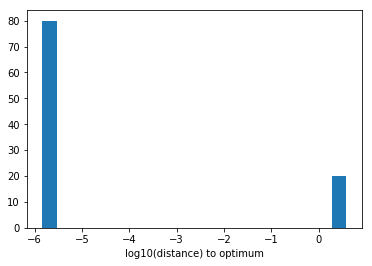

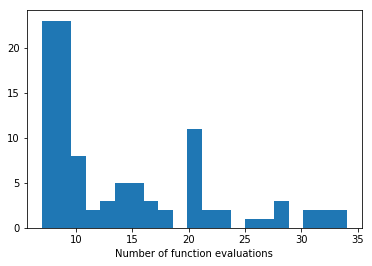

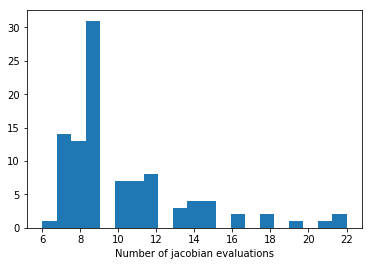

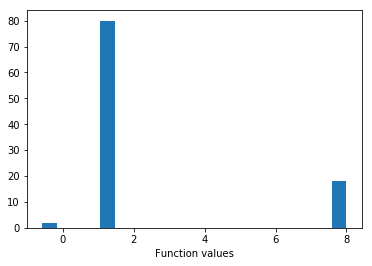

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print('Solve Problem 100 times using SLSQP')

SOL = np.array([0,   1.41421358e+00,   1.41421543e+00])
distancesol = []
nfev = []
njev = []
fval = []

for i in range(100):
    x0 = np.random.random(3)*10

    cons = [{'fun':g1,'type':'ineq','jac':dg1dx},{'fun':g2,'type':'ineq','jac':dg2dx},{'fun':g3,'type':'ineq','jac':dg3dx},{'fun':g4,'type':'ineq','jac':dg4dx},{'fun':g5,'type':'ineq','jac':dg5dx},{'fun':g6,'type':'ineq','jac':dg6dx}]
    solution = opt.minimize(f,x0,jac=dfdx,constraints=cons,method='SLSQP')

    distancesol.append(np.linalg.norm(solution['x']-SOL))
    nfev.append(solution['nfev'])
    njev.append(solution['njev'])    
    fval.append(solution['fun'])
    
print('Number of Nans',np.sum(np.isnan(distancesol)))
distancesol = np.array(distancesol);nfev = np.array(nfev);njev = np.array(njev);fval = np.array(fval)
plt.figure(1);plt.hist(np.log10(distancesol[~np.isnan(distancesol)]),21);plt.xlabel('log10(distance) to optimum');plt.show()
plt.figure(2);plt.hist(nfev[~np.isnan(nfev)],21);plt.xlabel('Number of function evaluations');plt.show()
plt.figure(3);plt.hist(njev[~np.isnan(njev)],21);plt.xlabel('Number of jacobian evaluations');plt.show()
plt.figure(4);plt.hist(fval[~np.isnan(fval)],21);plt.xlabel('Function values');plt.show()

# Solving problem without supplying analytical gradients to the SLSQP algorithm

Solve Problem 100 times using SLSQP
Number of Nans 0


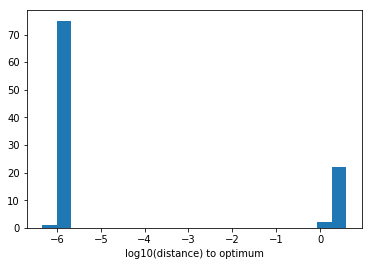

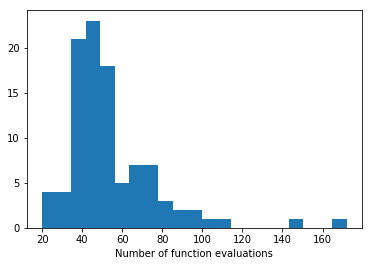

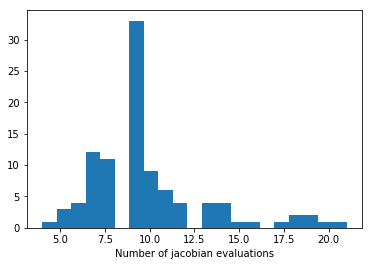

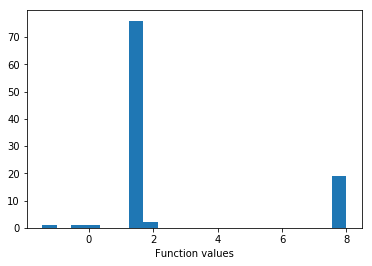

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print('Solve Problem 100 times using SLSQP')

SOL = np.array([0,   1.41421358e+00,   1.41421543e+00])
distancesol = []
nfev = []
njev = []
fval = []

for i in range(100):
    x0 = np.random.random(3)*10

    cons = [{'fun':g1,'type':'ineq'},{'fun':g2,'type':'ineq'},{'fun':g3,'type':'ineq'},{'fun':g4,'type':'ineq'},{'fun':g5,'type':'ineq'},{'fun':g6,'type':'ineq'}]
    solution = opt.minimize(f,x0,constraints=cons,method='SLSQP')

    distancesol.append(np.linalg.norm(solution['x']-SOL))
    nfev.append(solution['nfev'])
    njev.append(solution['njev'])    
    fval.append(solution['fun'])
    
print('Number of Nans',np.sum(np.isnan(distancesol)))
distancesol = np.array(distancesol);nfev = np.array(nfev);njev = np.array(njev);fval = np.array(fval)
plt.figure(1);plt.hist(np.log10(distancesol[~np.isnan(distancesol)]),21);plt.xlabel('log10(distance) to optimum');plt.show()
plt.figure(2);plt.hist(nfev[~np.isnan(nfev)],21);plt.xlabel('Number of function evaluations');plt.show()
plt.figure(3);plt.hist(njev[~np.isnan(njev)],21);plt.xlabel('Number of jacobian evaluations');plt.show()
plt.figure(4);plt.hist(fval[~np.isnan(fval)],21);plt.xlabel('Function values');plt.show()

# Solving problem with supplying analytical gradients to the SLSQP algorithm

Solve Problem 100 times using COBYLA
Number of Nans 0


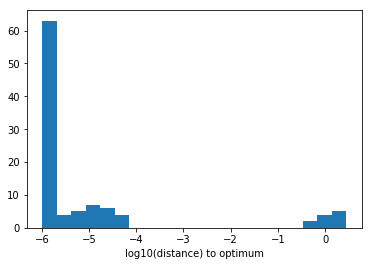

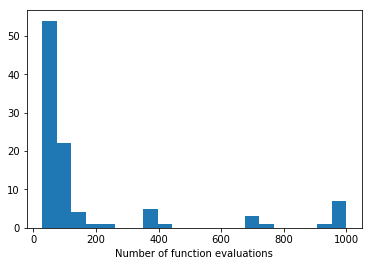

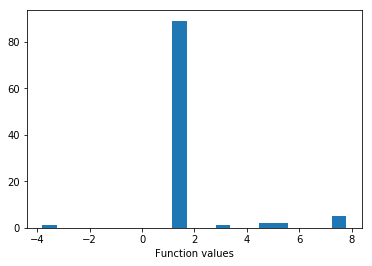

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print('Solve Problem 100 times using COBYLA')

SOL = np.array([0,   1.41421358e+00,   1.41421543e+00])
distancesol = []
nfev = []
fval = []

for i in range(100):
    x0 = np.random.random(3)*10
    cons = [{'fun':g1,'type':'ineq'},{'fun':g2,'type':'ineq'},{'fun':g3,'type':'ineq'},{'fun':g4,'type':'ineq'},{'fun':g5,'type':'ineq'},{'fun':g6,'type':'ineq'}]
    solution = opt.minimize(f,x0,constraints=cons,method='COBYLA')

    distancesol.append(np.linalg.norm(solution['x']-SOL))
    nfev.append(solution['nfev'])   
    fval.append(solution['fun'])
    
print('Number of Nans',np.sum(np.isnan(distancesol)))
distancesol = np.array(distancesol);nfev = np.array(nfev);njev = np.array(njev);fval = np.array(fval)
plt.figure(1);plt.hist(np.log10(distancesol[~np.isnan(distancesol)]),21);plt.xlabel('log10(distance) to optimum');plt.show()
plt.figure(2);plt.hist(nfev[~np.isnan(nfev)],21);plt.xlabel('Number of function evaluations');plt.show()
plt.figure(4);plt.hist(fval[~np.isnan(fval)],21);plt.xlabel('Function values');plt.show()

# Recovering Lagrange multipliers of the Active constraints
# Inactive constraints the Lagrange multipliers are zero
# Very useful information when considering changes to the optimization problem
# Which constraints to relax or which constraints to tighten for the best outcome

In [85]:
print('Recovering the Lagrange Multipliers from Solving Linear System of Equations')
print('Aim is to express the gradient of the objective function as a linear combination of the gradients of the active constraints')


print('Find all active constraints')
print('Constraint 1 {}'.format(cons[0]['fun'](solution['x'])))
print('Constraint 2 {}'.format(cons[1]['fun'](solution['x'])))
print('Constraint 3 {}'.format(cons[2]['fun'](solution['x'])))
print('Constraint 4 {}'.format(cons[3]['fun'](solution['x'])))
print('Constraint 5 {}'.format(cons[4]['fun'](solution['x'])))
print('Constraint 6 {}'.format(cons[5]['fun'](solution['x'])))
print('Active constraints: 1,2,4')

# Each constraint gradient is a column vector - stored here one constraint gradient per row - hence DGDX^T 
DGDXT = array([dg1dx(solution['x']),dg2dx(solution['x']),dg4dx(solution['x'])])

# Setup least squares solution - if number of active constraints is less than the problem dimensionality
# DGDX^T DGDX * LAMBDA = DGDX^T DFDX 
# GTF = dot(DGDXT,dfdx(solution['x']))
# GTG = dot(DGDXT,DGDXT.transpose())
# lam = solve(GTG,GTF)
# print('Lagrange multipliers {}'.format(lam))

# Three active constraints for a three dimensional problem - linear system of equations that can easily solve
lam = solve(DGDXT.transpose(),dfdx(solution['x']))
print('Lagrange multipliers: {}'.format(lam))
print('The larger the Lagrange multiplier the larger its contribution to oppose the objective function gradient')
print('Very use')

Recovering the Lagrange Multipliers from Solving Linear System of Equations
Aim is to express the gradient of the objective function as a linear combination of the gradients of the active constraints
Find all active constraints
Constraint 1 -7.154277170684509e-13
Constraint 2 1.56097357262297e-12
Constraint 3 3.5857864376267554
Constraint 4 8.182297239733219e-14
Constraint 5 1.4142135623734975
Constraint 6 1.4142135623732446
Active constraints: 1,2,4
Lagrange multipliers: [ -0.5         34.5          2.82842712]
The larger the Lagrange multiplier the larger its contribution to oppose the objective function gradient
If you want to 


# Evolutionary methods that only use function values
# Particle Swarm Optimization Algorithm
# Stochastic - every time you run the algorithm you get a different answer - even for the same starting points
# Population based algorithm - choose number of particles not only one starting point
# Sensitive to settings - Addressed by multiple short runs that converge quickly


# Parameters to choose: 
## 1. Number of particles
## 2. Problem bounds
## 3. $\omega$ - damping in the system
## 4. $c_1$ - spring constant particle best
## 5. $c_2$ - spring constant global best


# $$\mathbf{v}_{k+1}^i = \omega\mathbf{v}_{k}^i + c_1 \mathbf{r1}_k^i \otimes(\mathbf{x}^i_{pbest}-\mathbf{x}^i) + c_2 \mathbf{r2}_k^i\otimes(\mathbf{x}_{gbest} - \mathbf{x}^i)$$
# $$\mathbf{x}_{k+1}^i = \mathbf{x}_{k}^i + \mathbf{v}_{k+1}^i\Delta t$$


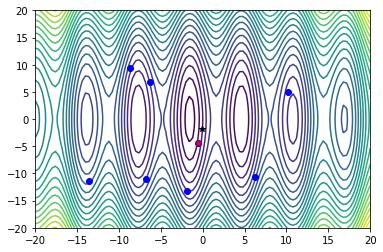

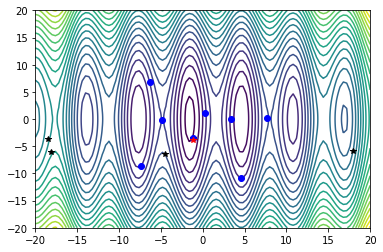

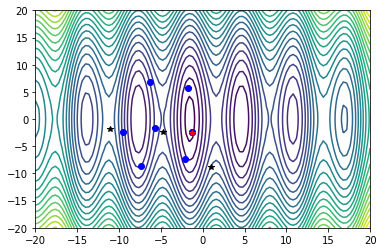

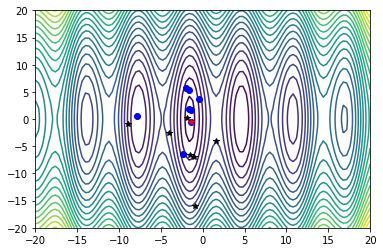

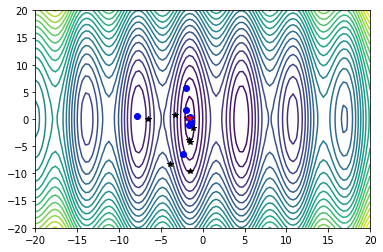

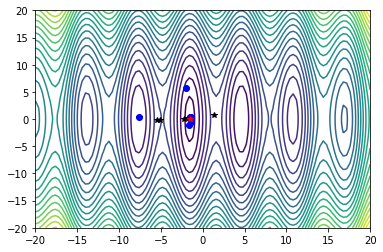

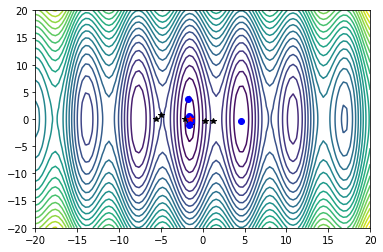

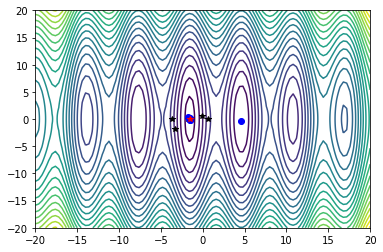

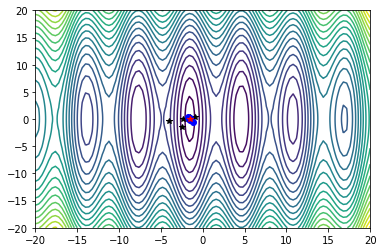

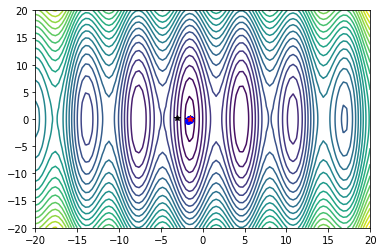

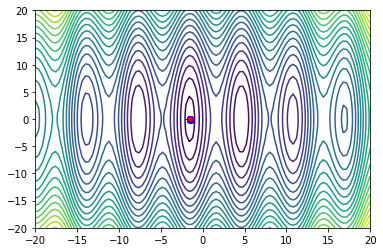

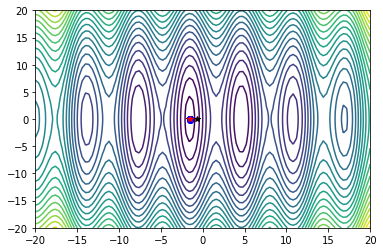

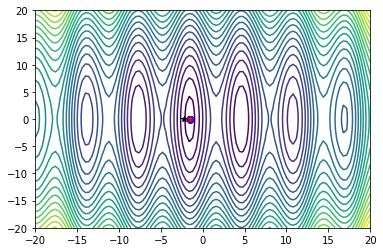

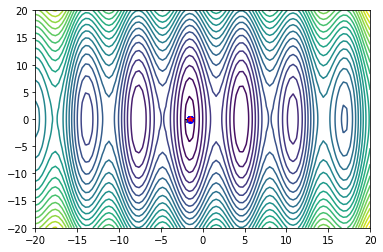

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

def evaluate_function(function,X):
    import numpy as np
    particles,dimension = X.shape
    fvalue = []
    for particle in range(particles):
        fvalue.append(function(X[particle,:]))
    
    return np.array(fvalue)

def update_particle_best(F,X,Fbest,Xbest):
    Xnew = Xbest
    Fnew = Fbest
    indexupdate = F < Fbest
    Xnew[indexupdate,:] = X[indexupdate,:] 
    Fnew[indexupdate] = F[indexupdate]
    return (Xnew,Fnew)
        
def pso(function,bounds,PLOTFLAG):
    import time
    import numpy as np
    import matplotlib.pyplot as plt
    w = 0.7
    c1 = 1.4
    c2 = 1.4
    dt = 1
    
    ub = np.array(bounds)[:,1]
    lb = np.array(bounds)[:,0]

    number_particles = 4*len(ub)
    problem_dimension = len(ub)
    X = np.random.rand(number_particles,len(ub))
    V = np.random.rand(number_particles,len(ub))
    for i in range(len(ub)):
        X[:,i] = lb[i] + (ub[i]-lb[i])*X[:,i]
        V[:,i] = 0.1*(ub[i]-lb[i])*X[:,i]
    particlebestF = evaluate_function(function,X)
    particlebestX = X
    NOT_CONVERGED = True
        
    iterations = 1
    while NOT_CONVERGED and iterations < 500:
        Vold = V

        globalbestindex = particlebestF.min()==particlebestF
        globalbestX = particlebestX[globalbestindex,:]
        globalbestF = particlebestF[globalbestindex]

        V = w*Vold + c1*np.random.rand(problem_dimension)*(particlebestX - X) + c2*np.random.rand(problem_dimension)*(globalbestX[0,:]-X)
        X = X + V*dt

        currentF = evaluate_function(function,X)
        iterations = iterations + 1
        particlebestX,particlebestF = update_particle_best(currentF,X,particlebestF,particlebestX)

        if iterations%5 == 0 and PLOTFLAG:
            plotfunction2D(plt.figure(1))
            plt.plot(X[:,0],X[:,1],'k*')
            plt.plot(particlebestX[:,0],particlebestX[:,1],'bo')
            plt.plot(globalbestX[:,0],globalbestX[:,1],'r*')
            plt.axis([-20,20,-20,20])
            plt.show()
            input('')
    
        if sum(sum(V**2)) < 0.001*(ub.max()-lb.min()):
            NOT_CONVERGED = False
    
        functioncount = iterations*number_particles
    
    result = {'nfev':functioncount,'nit':iterations,'x':globalbestX[0,:],'fun':globalbestF[0]}
    return result


def objective(x):
    return x[0]**2 + x[1]**2 + 100*np.sin(x[0])

def derivative(x):
    return np.array([2*x[0]+100*np.cos(x[0]),2*x[1]])

bounds = [(-20,20), (-20,20)] 

result = pso(objective,bounds,True)

# Multimodal problems i.e. problems with more than one local minimum
# Gradient based approaches very sensitive to initial starting point
# Evolutionary strategies are less sensitive

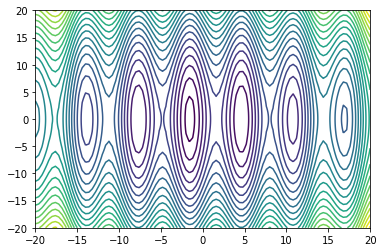

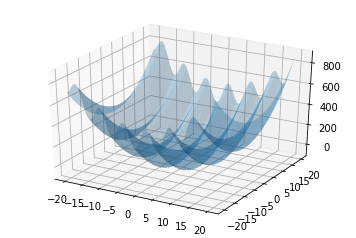

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

[XX1,XX2] = np.meshgrid(np.linspace(-20,20,101),np.linspace(-20,20,101))
ACTUALSURF = (XX1)**2 + (XX2)**2 + 100*np.sin(1*XX1)

def plotfunction3D(fig):
    from mpl_toolkits.mplot3d import Axes3D
    ax = fig.add_subplot(111, projection='3d')
    [XX1,XX2] = np.meshgrid(np.linspace(-20,20,101),np.linspace(-20,20,101))
    ACTUALSURF = (XX1)**2 + (XX2)**2 + 100*np.sin(1*XX1)
    ax.plot_surface(XX1,XX2,ACTUALSURF,alpha=0.3)
    
def plotfunction2D(fig):
    plt.figure(1)
    [XX1,XX2] = np.meshgrid(np.linspace(-20,20,101),np.linspace(-20,20,101))
    ACTUALSURF = (XX1)**2 + (XX2)**2 + 100*np.sin(1*XX1)
    plt.contour(XX1,XX2,ACTUALSURF,31)
    

plotfunction2D(plt.figure(1))
plotfunction3D(plt.figure(2))

# Solving problem using Quasi-Newton BFGS

      fun: -39.52684283193044
 hess_inv: array([[  9.92025782e-03,   1.33737553e-07],
       [  1.33737553e-07,   4.99116564e-01]])
      jac: array([  6.72605260e-09,  -9.17549673e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ -7.69937891e+00,  -4.58774837e-09])


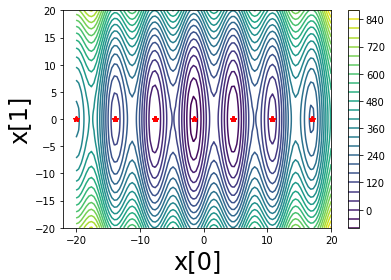

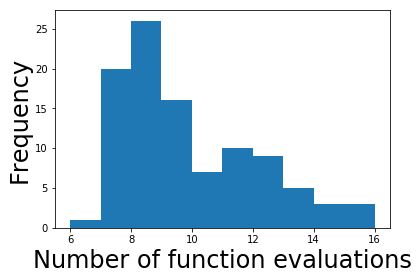

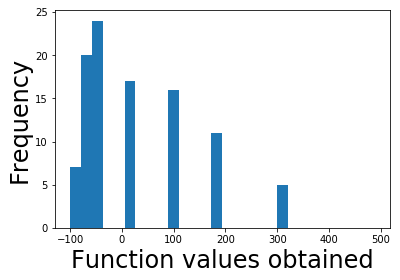

In [87]:
%matplotlib inline
import scipy.optimize as opt
import numpy as np

def objective(x):
    return x[0]**2 + x[1]**2 + 100*np.sin(x[0])

def derivative(x):
    return np.array([2*x[0]+100*np.cos(x[0]),2*x[1]])

X0 = 40*np.random.rand(100,2)-20

SOLUTIONS = []
FUNVALUE = []
FUNEVAL = []
for x0 in X0:
    result = opt.minimize(objective,x0,method='BFGS',jac=derivative)
    SOLUTIONS.append(result['x'])
    FUNVALUE.append(result['fun'])
    FUNEVAL.append(result['nfev'])

SOLUTIONS = np.array(SOLUTIONS)
plt.contour(XX1,XX2,ACTUALSURF,31)
plt.figure(1),plt.plot(SOLUTIONS[:,0],SOLUTIONS[:,1],'r*');plt.colorbar();plt.xlabel('x[0]',fontsize=24);plt.ylabel('x[1]',fontsize=24)
plt.figure(2),plt.hist(FUNEVAL);plt.xlabel('Number of function evaluations',fontsize=24);plt.ylabel('Frequency',fontsize=24)
plt.figure(3),plt.hist(FUNVALUE,range(-100,500,21));plt.xlabel('Function values obtained',fontsize=24);plt.ylabel('Frequency',fontsize=24)
print(result)

# Solving problem using Function Value Only - Nelder-Mead / Simplex Algorithm

 final_simplex: (array([[  1.07782895e+01,   6.67570416e-05],
       [  1.07783196e+01,  -2.63381209e-05],
       [  1.07783150e+01,   1.64920057e-04]]), array([ 18.52288545,  18.52288545,  18.52288547]))
           fun: 18.522885445364963
       message: 'Optimization terminated successfully.'
          nfev: 86
           nit: 45
        status: 0
       success: True
             x: array([  1.07782895e+01,   6.67570416e-05])


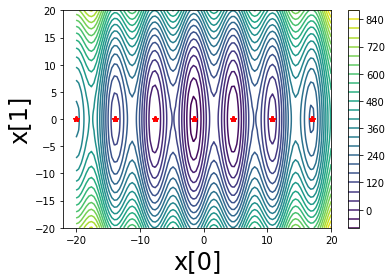

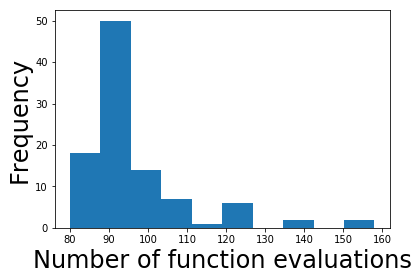

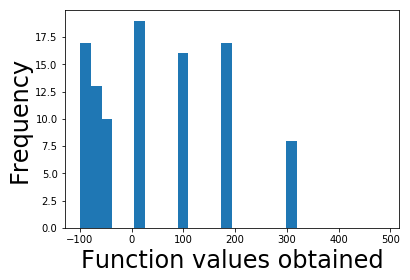

In [88]:
%matplotlib inline
import scipy.optimize as opt
import numpy as np

def objective(x):
    return x[0]**2 + x[1]**2 + 100*np.sin(x[0])

def derivative(x):
    return np.array([2*x[0]+100*np.cos(x[0]),2*x[1]])

X0 = 40*np.random.rand(100,2)-20

SOLUTIONS = []
FUNEVAL = []
FUNVALUE = []
for x0 in X0:
    result = opt.minimize(objective,x0,method='Nelder-Mead')
    SOLUTIONS.append(result['x'])
    FUNVALUE.append(result['fun'])
    FUNEVAL.append(result['nfev'])

SOLUTIONS = np.array(SOLUTIONS)
plt.contour(XX1,XX2,ACTUALSURF,31)
plt.figure(1),plt.plot(SOLUTIONS[:,0],SOLUTIONS[:,1],'r*');plt.colorbar();plt.xlabel('x[0]',fontsize=24);plt.ylabel('x[1]',fontsize=24)
plt.figure(2),plt.hist(FUNEVAL);plt.xlabel('Number of function evaluations',fontsize=24);plt.ylabel('Frequency',fontsize=24)
plt.figure(3),plt.hist(FUNVALUE,range(-100,500,21));plt.xlabel('Function values obtained',fontsize=24);plt.ylabel('Frequency',fontsize=24)

print(result)

# Solving problem using Function Value Only - PSO Algorithm

{'nfev': 768, 'nit': 96, 'x': array([-1.53781371,  0.00472839]), 'fun': -97.580718916231106}


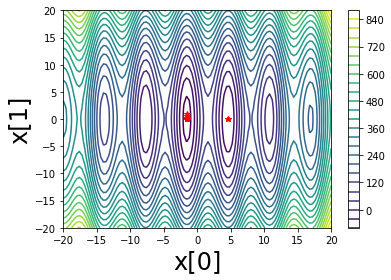

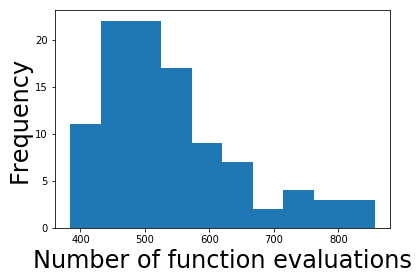

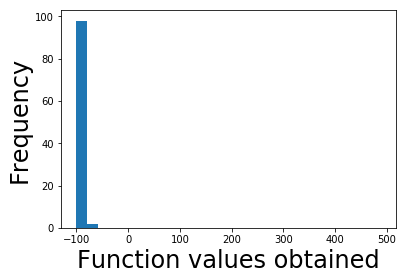

In [94]:
%matplotlib inline
import scipy.optimize as opt
import numpy as np

def objective(x):
    return x[0]**2 + x[1]**2 + 100*np.sin(x[0])

def derivative(x):
    return np.array([2*x[0]+100*np.cos(x[0]),2*x[1]])

X0 = 40*np.random.rand(100,2)-20

SOLUTIONS = []
FUNEVAL = []
FUNVALUE = []
for x0 in X0:
    result = pso(objective,bounds,False)
    SOLUTIONS.append(result['x'])
    FUNVALUE.append(result['fun'])
    FUNEVAL.append(result['nfev'])

SOLUTIONS = np.array(SOLUTIONS)
plt.contour(XX1,XX2,ACTUALSURF,31)
plt.figure(1),plt.plot(SOLUTIONS[:,0],SOLUTIONS[:,1],'r*');plt.colorbar();plt.xlabel('x[0]',fontsize=24);plt.ylabel('x[1]',fontsize=24)
plt.figure(2),plt.hist(FUNEVAL);plt.xlabel('Number of function evaluations',fontsize=24);plt.ylabel('Frequency',fontsize=24)
plt.figure(3),plt.hist(FUNVALUE,range(-100,500,21));plt.xlabel('Function values obtained',fontsize=24);plt.ylabel('Frequency',fontsize=24)

print(result)

# Solving problem using Function Value Only - Differential Evolution Algorithm

     fun: -97.580983064124027
     jac: array([ -1.56319402e-05,  -1.42108547e-06])
 message: 'Optimization terminated successfully.'
    nfev: 351
     nit: 10
 success: True
       x: array([ -1.53999178e+00,  -2.60564911e-07])


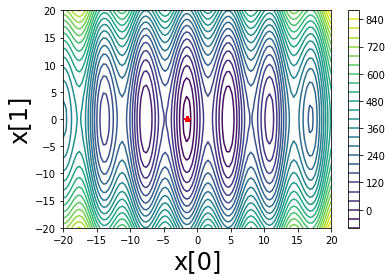

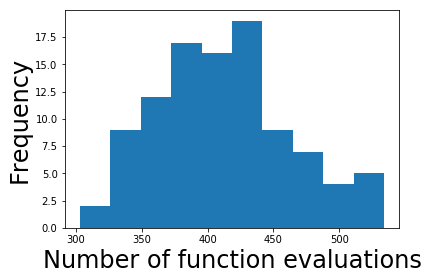

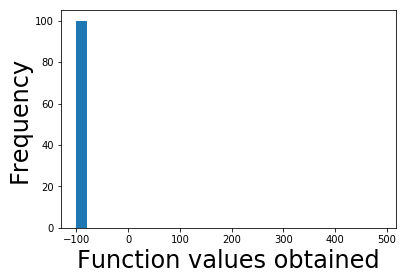

In [95]:
%matplotlib inline
import scipy.optimize as opt
import numpy as np

def objective(x):
    return x[0]**2 + x[1]**2 + 100*np.sin(x[0])

def derivative(x):
    return np.array([2*x[0]+100*np.cos(x[0]),2*x[1]])

X0 = 40*np.random.rand(100,2)-20

SOLUTIONS = []
FUNEVAL = []
FUNVALUE = []
for x0 in X0:
    result = opt.differential_evolution(objective,bounds)
    SOLUTIONS.append(result['x'])
    FUNVALUE.append(result['fun'])
    FUNEVAL.append(result['nfev'])

SOLUTIONS = np.array(SOLUTIONS)
plt.contour(XX1,XX2,ACTUALSURF,31)
plt.figure(1),plt.plot(SOLUTIONS[:,0],SOLUTIONS[:,1],'r*');plt.colorbar();plt.xlabel('x[0]',fontsize=24);plt.ylabel('x[1]',fontsize=24)
plt.figure(2),plt.hist(FUNEVAL);plt.xlabel('Number of function evaluations',fontsize=24);plt.ylabel('Frequency',fontsize=24)
plt.figure(3),plt.hist(FUNVALUE,range(-100,500,21));plt.xlabel('Function values obtained',fontsize=24);plt.ylabel('Frequency',fontsize=24)

print(result)

# Discontinuous Optimization Problems
## Show Videos to Demonstrate

# Consider typical engineering problem
# Objective function involves a differential equation to be solved
# Consider changes in the time discretization over which we integrate
# Inverse analysis - we know the integral of the differential equation at some time in the future. We need to estimate some two unknowns of the differential equation
# $$
\begin{eqnarray}
\frac{dz(t)}{dt} &=& (1-\lambda)z(t) - \beta z(t)y(t)\\
\frac{dy(t)}{dt} &=& \delta z(t)y(t) -\gamma y(t)\\
\end{eqnarray}
$$
# Given $\beta=0.3$,$\delta=\gamma=1$. $z(0)=y(0)=0.9$. Given that 

In [1]:
import numpy as np

def predatorprey(params,x0=1,y0=1,endtime=8,timesteps=20):

    alpha,beta,delta,gamma = params
    x = [x0]
    y = [y0]
    timevec = np.linspace(0,endtime,timesteps);
    dt = timevec[1]-timevec[0]

    for time in timevec[1:]:
        X = x[-1]+((1.0-alpha)*x[-1] - beta*x[-1]*y[-1])*dt
        Y = y[-1]+(delta*x[-1]*y[-1] - gamma*y[-1])*dt
        
        x.append(X)
        y.append(Y)

    return x, y, timevec

def sumerror(target,alpha,timesteps):
    x,y,t = predatorprey([alpha,0.3,1,1],0.9,0.9,8,timesteps)
    solution = [x[-1],y[-1]]
    return np.sum((np.array(solution) - np.array(target))**2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


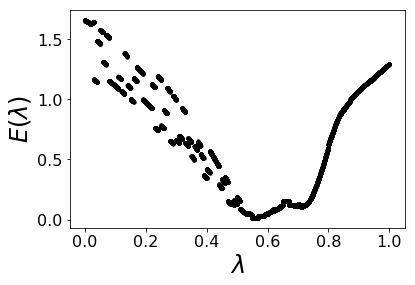

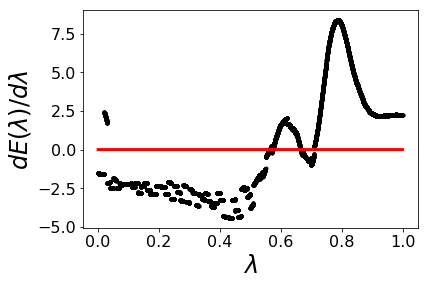

In [102]:
import matplotlib.pyplot as plt

x,y,t = predatorprey([0.5,0.3,1,1],0.9,0.9,8,50000)
target = [x[-1],y[-1]]

Error = []
Derivative = []
Alphas = np.linspace(0,1,10001)
delta = 1E-20

randomfrac = 5
mean = 30
piecewise_random = np.random.randint(mean/randomfrac)
counter = 1

for alpha in Alphas:
    if counter % 100 == 0:
        piecewise_random = np.random.randint(mean/randomfrac)
    
    timesteps = np.round(mean + 2*piecewise_random - mean/randomfrac)

    Solution = sumerror(target,complex(alpha,delta),timesteps)
    Error.append(Solution.real)
    Derivative.append(Solution.imag/delta)
    
    counter += 1

FS = 24
plt.figure(1)
plt.plot(Alphas,Error,'k.')
plt.xlabel('$\lambda$',fontsize=FS)
plt.ylabel('$E(\lambda)$',fontsize=FS)
plt.tick_params(axis='both', which='major', labelsize=FS-8)
plt.axis()
plt.show()

plt.figure(2)
plt.plot(Alphas,Derivative,'k.')
plt.plot(Alphas,Alphas*0,'r-',linewidth=3)
plt.xlabel('$\lambda$',fontsize=FS)
plt.ylabel('$dE(\lambda)/d\lambda$',fontsize=FS)
plt.tick_params(axis='both', which='major', labelsize=FS-8)
plt.show()

# Alternative formulation required
# Function is discontinuous - derivatives are redefined as associate derivatives
# Gradient-only optimization that defines non-negative associate gradient projection points as the points to the solution:
# $\boldsymbol{x}^*_{nnp}\in X$ is a non-negative associated gradient projection point (NN-GPP) if there exists a real number $r_u>0$ for every $\boldsymbol{u}\in\{\boldsymbol{y}\in\mathbb{R}^n \; / \; \|\boldsymbol{y}\| = 1\}$ such that
# 	$$\nabla\mathbf{f}^\textrm{T}(\boldsymbol{x}^*_{npp} +
	\lambda\boldsymbol{u})\boldsymbol{u} \geq 0,
	\;\forall\;\lambda\in(0,r_u].$$

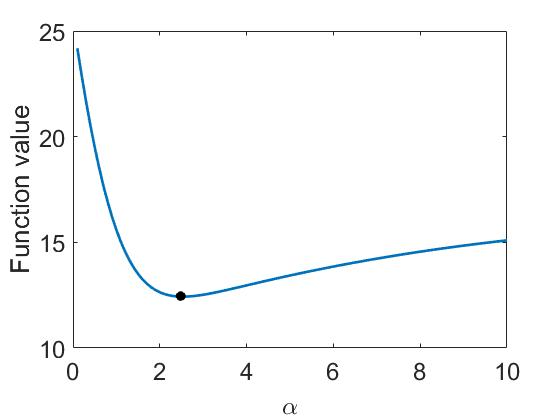

In [109]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
I = Image("func.png"); I

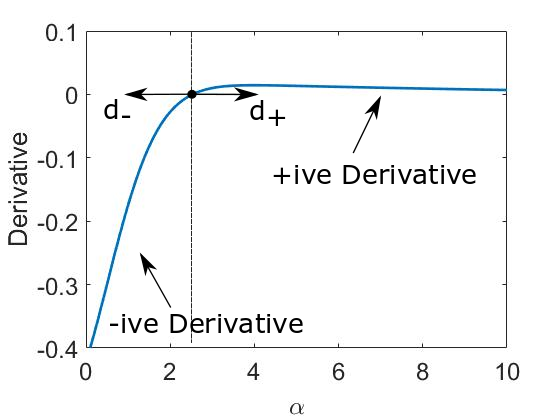

In [110]:
II = Image("deriv.png"); II

# Optimization algorithms consider only derivative / gradient information
# Conisder the 1D functions above - representative of a line search
# Along a line search a NPP is defined by a sign change from negative to positive
# This signifies a minimum - second order information is included in the order of the sign change i.e. positive to negative would signify a maximum

In [146]:
x,y,t = predatorprey([0.5,0.3,1,1],0.9,0.9,8,50000)
target = [x[-1],y[-1]]

def objective(alpha): 
    piecewise_random = np.random.randint(mean/randomfrac)
    timesteps = np.round(mean + 2*piecewise_random - mean/randomfrac);
    return sumerror(target,alpha,timesteps)
    
def derivative(alpha): 
    piecewise_random = np.random.randint(mean/randomfrac)
    timesteps = np.round(mean + 2*piecewise_random - mean/randomfrac);
    return imag(sumerror(target,complex(alpha,delta),timesteps))/delta

import scipy.optimize as opt

print(opt.minimize(objective,[0.2]))
print(opt.minimize_scalar(objective))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


      fun: 1.7779417213406719
 hess_inv: array([[1]])
      jac: array([ 46158890.49983075])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 315
      nit: 0
     njev: 101
   status: 2
  success: False
        x: array([ 0.2])
     fun: 0.014036973283300742
    nfev: 37
     nit: 36
 success: True
       x: 0.56095654673633277


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


0.38119512277207607